## house price project for ITI


In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [6]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [7]:
pd.set_option('max_columns',None)

# combine train and test data

In [8]:
target = train["SalePrice"]
trainid = train["Id"]
testid = test["Id"]
train1 = train.drop(["SalePrice","Id"],axis = 1)
test1 = test.drop(["Id"],axis = 1 )
data = pd.concat([train1,test1] ,axis = 0)

In [9]:
data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           

In [10]:
data.shape

(2919, 79)

In [11]:
describe = data.describe()

In [12]:
 describe.loc['iqr',:] = describe.loc['75%',:]-describe.loc['25%',:]

In [13]:
describe

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  2919.000000  2433.000000    2919.000000  2919.000000  2919.000000   
mean     57.137718    69.305795   10168.114080     6.089072     5.564577   
std      42.517628    23.344905    7886.996359     1.409947     1.113131   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7478.000000     5.000000     5.000000   
50%      50.000000    68.000000    9453.000000     6.000000     5.000000   
75%      70.000000    80.000000   11570.000000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   
iqr      50.000000    21.000000    4092.000000     2.000000     1.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  2919.000000   2919.000000  2896.000000  2918.000000  2918.000000   
mean   1971.312778   1984.264474   102.201312   441.423235    49.582248   
std      30.291442     20.894344   179.334253   455.610826   169.205611   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1953.500000   1965.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1993.000000     0.000000   368.500000     0.000000   
75%    2001.000000   2004.000000   164.000000   733.000000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1526.000000   
iqr      47.500000     39.000000   164.000000   733.000000     0.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  2918.000000  2918.000000  2919.000000  2919.000000   2919.000000   
mean    560.772104  1051.777587  1159.581706   336.483727      4.694416   
std     439.543659   440.766258   392.362079   428.701456     46.396825   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     220.000000   793.000000   876.000000     0.000000      0.000000   
50%     467.000000   989.500000  1082.000000     0.000000      0.000000   
75%     805.500000  1302.000000  1387.500000   704.000000      0.000000   
max    2336.000000  6110.000000  5095.000000  2065.000000   1064.000000   
iqr     585.500000   509.000000   511.500000   704.000000      0.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  2919.000000   2917.000000   2917.000000  2919.000000  2919.000000   
mean   1500.759849      0.429894      0.061364     1.568003     0.380267   
std     506.051045      0.524736      0.245687     0.552969     0.502872   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1126.000000      0.000000      0.000000     1.000000     0.000000   
50%    1444.000000      0.000000      0.000000     2.000000     0.000000   
75%    1743.500000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     4.000000     2.000000   
iqr     617.500000      1.000000      0.000000     1.000000     1.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   2919.000000   2919.000000   2919.000000  2919.000000  2760.000000   
mean       2.860226      1.044536      6.451524     0.597122  1978.113406   
std        0.822693      0.214462      1.569379     0.646129    25.574285   
min        0.000000      0.000000      2.000000     0.000000  1895.000000   
25%        2.000000      1.000000      5.000000     0.000000  1960.000000   
50%        3.000000      1.000000      6.000000     1.000000  1979.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     15.000000     4.000000  2207.000000   
iqr        1.000000      0.000000      2.000000     1.000000    42.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  2918.000000  2918.000000  2919.000000  2919.000000    2919.000000   
mean      1.766621   472.874572    93.709832    47.486811    

# data cleaning

##  ensure proper data types 

In [14]:
data.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 79, dtype: object

In [15]:
data.select_dtypes(np.number)

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1454         160         21.0     1936            4            7       1970   
1455         160         21.0     1894            4            5       1970   
1456          20        160.0    20000            5            7       1960   
1457          85         62.0    10441            5            5       1992   
1458          60         74.0     9627            7            5       1993   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0             2003       196.0       706.0         0.0      150.0   
1             1976         0.0       978.0         0.0      284.0   
2             2002       162.0       486.0         0.0      434.0   
3             1970         0.0       216.0         0.0      540.0   
4             2000       350.0       655.0         0.0      490.0   
...            ...         ...         ...         ...        ...   
1454          1970         0.0         0.0         0.0      546.0   
1455          1970         0.0       252.0         0.0      294.0   
1456          1996         0.0      1224.0         0.0        0.0   
1457          1992         0.0       337.0         0.0      575.0   
1458          1994        94.0       758.0         0.0      238.0   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0           856.0       856       854             0       1710           1.0   
1          1262.0      1262         0             0       1262           0.0   
2           920.0       920       866             0       1786           1.0   
3           756.0       961       756             0       1717           1.0   
4          1145.0      1145      1053             0       2198           1.0   
...           ...       ...       ...           ...        ...           ...   
1454        546.0       546       546             0       1092           0.0   
1455        546.0       546       546             0       1092           0.0   
1456       1224.0      1224         0             0       1224           1.0   
1457        912.0       970         0             0        970           0.0   
1458        996.0       996      1004             0       2000           0.0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0              0.0         2         1             3             1   
1              1.0         2         0             3             1   
2              0.0         2         1             3             1   
3              0.0         1         0             3             1   
4              0.0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1454           0.0         1         1             3             1   
1455           0.0         1         1             3             1   
1456           0.0         1         0             4             1   
1457           1.0         1         0             3             1   
1458           0.0         2         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                8           0       2003.0         2.0       548.0   
1                6           1       1976.0         2.0       460.0   
2                6           1       2001.0         2.0       608.0   
3                7           1       1998.0         3.0       642.0   
4                9           1       2000.0         3.0       836.0   


In [16]:
# cause MSSubClass: Identifies the type of dwelling involved in the sale  so it is categorical variable
data["MSSubClass"].value_counts()

20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [17]:
data2 = data
data2. MSSubClass= data2.MSSubClass.astype(str)

In [18]:
data2

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0            60       RL         65.0     8450   Pave   NaN      Reg   
1            20       RL         80.0     9600   Pave   NaN      Reg   
2            60       RL         68.0    11250   Pave   NaN      IR1   
3            70       RL         60.0     9550   Pave   NaN      IR1   
4            60       RL         84.0    14260   Pave   NaN      IR1   
...         ...      ...          ...      ...    ...   ...      ...   
1454        160       RM         21.0     1936   Pave   NaN      Reg   
1455        160       RM         21.0     1894   Pave   NaN      Reg   
1456         20       RL        160.0    20000   Pave   NaN      Reg   
1457         85       RL         62.0    10441   Pave   NaN      Reg   
1458         60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1458         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1454       Norm    Twnhs     2Story            4            7       1970   
1455       Norm   TwnhsE     2Story            4            5       1970   
1456       Norm     1Fam     1Story            5            7       1960   
1457       Norm     1Fam     SFoyer            5            5       1992   
1458       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1454          1970     Gable  CompShg     CemntBd     CmentBd       None   
1455          1970     Gable  CompShg     CemntBd     CmentBd       None   
1456          1996     Gable  CompShg     VinylSd     VinylSd       None   
1457          1992     Gable  CompShg     HdBoard     Wd Shng       None   
1458          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   
4          350.0        Gd        TA      PConc       Gd       TA   
...        

# filling categorical missing value 

In [19]:
mask =  data2.isnull().sum() > 0 

In [20]:
data2.select_dtypes(object).loc[: , mask ].columns 

Index(['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType'],
      dtype='object')

In [21]:
#start imputing the null value first we will see the data description to see if the null value make sense or not if null make
#make sense we will replace it with None if not we will replace it with mode 
for i in ['Alley',
          'BsmtQual',
          'BsmtCond',
          'BsmtExposure',
          'BsmtFinType1',
          'BsmtFinType2',
          'FireplaceQu', 
          'GarageType',
          'GarageFinish', 
          'GarageQual', 
          'GarageCond',
          'PoolQC',
         'Fence',
         'MiscFeature']:
    data2[i] = data2[i].fillna('None')
    
for i in ['MSZoning',
          'Utilities',
          'Exterior1st',
          'Exterior2nd',
          'MasVnrType',
          'Electrical',
          'KitchenQual',
          'Functional',
         'SaleType']:
    data2[i] = data2[i].fillna(data2[i].mode()[0])

In [22]:
data2.select_dtypes('object').isnull().sum()

MSSubClass       0
MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

##  numeric missing value 

In [23]:
# from extrenal help I decided to use k neighbors to impute the numerical variable 


In [24]:
data2.select_dtypes(np.number).isnull().sum()

LotFrontage      486
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt      159
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [25]:
from sklearn.impute import KNNImputer

In [26]:
data3 = data2.copy()

In [27]:
X_impute = data3.select_dtypes(np.number)

In [28]:
knn_imp = KNNImputer(n_neighbors=7,weights='distance')

In [29]:
 data_impute =  pd.DataFrame(knn_imp.fit_transform(X_impute),columns = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'])

In [30]:
cols = data3.select_dtypes(np.number).columns

In [31]:
for col in cols:
    data3[col] = data_impute[col]

In [32]:
data3.isnull().sum().sum()

0

In [33]:
data3.describe()

LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  \
count  2919.000000    2919.000000  2919.000000  2919.000000  2919.000000   
mean     70.688897   10517.026721     6.099692     5.575197  1971.269955   
std      23.401085    9981.259159     1.382847     1.112772    30.202681   
min      21.000000    1300.000000     1.000000     1.000000  1872.000000   
25%      60.000000    7549.000000     5.000000     5.000000  1954.000000   
50%      70.000000    9477.000000     6.000000     5.000000  1973.000000   
75%      80.560034   11603.000000     7.000000     6.000000  2000.000000   
max     313.000000  215245.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count   2919.000000  2919.000000  2919.000000  2919.000000  2919.000000   
mean    1984.872559   104.014329   443.507366    46.465913   567.388147   
std       20.642130   180.796911   456.041988   161.256285   441.794809   
min     1950.000000     0.000000     0.000000     0.000000     0.000000   
25%     1967.000000     0.000000     0.000000     0.000000   223.000000   
50%     1994.000000     0.000000   383.000000     0.000000   479.000000   
75%     2004.000000   166.000000   712.000000     0.000000   808.000000   
max     2010.000000  1600.000000  5644.000000  1474.000000  2336.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  \
count  2919.000000  2919.000000  2919.000000   2919.000000  2919.000000   
mean   1057.361425  1162.594724   347.111339      5.846523  1515.552587   
std     438.689918   386.583872   436.481155     48.622961   525.458423   
min       0.000000   334.000000     0.000000      0.000000   334.000000   
25%     795.500000   882.000000     0.000000      0.000000  1129.000000   
50%     991.000000  1086.000000     0.000000      0.000000  1464.000000   
75%    1298.500000  1391.500000   728.000000      0.000000  1777.500000   
max    6110.000000  4692.000000  2065.000000    572.000000  5642.000000   

       BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  \
count   2919.000000   2919.000000  2919.000000  2919.000000   2919.000000   
mean       0.425146      0.057554     1.565262     0.382665      2.866393   
std        0.518802      0.238750     0.550816     0.502756      0.815774   
min        0.000000      0.000000     0.000000     0.000000      0.000000   
25%        0.000000      0.000000     1.000000     0.000000      2.000000   
50%        0.000000      0.000000     2.000000     0.000000      3.000000   
75%        1.000000      0.000000     2.000000     1.000000      3.000000   
max        3.000000      2.000000     3.000000     2.000000      8.000000   

       KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars  \
count   2919.000000   2919.000000  2919.000000  2919.000000  2919.000000   
mean       1.046591      6.517986     0.613224  1977.389561     1.767386   
std        0.220337      1.625365     0.644566    24.730667     0.747180   
min        0.000000      2.000000     0.000000  1900.000000     0.000000   
25%        1.000000      5.000000     0.000000  1960.000000     1.000000   
50%        1.000000      6.000000     1.000000  1978.000000     2.000000   
75%        1.000000      7.000000     1.000000  2001.000000     2.000000   
max        3.000000     14.000000     3.000000  2010.000000     4.000000   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  2919.000000  2919.000000  2919.000000    2919.000000  2919.000000   
mean    473.047619    94.024666    46.652963      21.961631     3.410757   
std     213.773732   124.774291    66.254850      61.117797    29.317263   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     336.000000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    25.000000       0.000000     0.000000   
75%     576.000000   168.000000    68.000000       0.000000

## feture selection 

In [34]:
pd.DataFrame(data3.corr())

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
LotFrontage       1.000000  0.395662     0.225579    -0.030680   0.094962   
LotArea           0.395662  1.000000     0.105801    -0.005629   0.014224   
OverallQual       0.225579  0.105801     1.000000    -0.091841   0.572332   
OverallCond      -0.030680 -0.005629    -0.091841     1.000000  -0.375968   
YearBuilt         0.094962  0.014224     0.572332    -0.375968   1.000000   
YearRemodAdd      0.058914  0.013771     0.550569     0.073881   0.592885   
MasVnrArea        0.182576  0.103635     0.413167    -0.128452   0.316322   
BsmtFinSF1        0.227361  0.214146     0.239952    -0.046349   0.249596   
BsmtFinSF2        0.072926  0.111243    -0.058737     0.040048  -0.049019   
BsmtUnfSF         0.115264 -0.002638     0.307977    -0.136739   0.148996   
TotalBsmtSF       0.379240  0.260851     0.538009    -0.171167   0.391501   
1stFlrSF          0.452369  0.299483     0.476346    -0.144239   0.282008   
2ndFlrSF          0.085521  0.050976     0.295340     0.029050   0.010252   
LowQualFinSF      0.033105  0.004777    -0.030465     0.025511  -0.183795   
GrLivArea         0.406914  0.263117     0.592962    -0.079627   0.198984   
BsmtFullBath      0.093406  0.158210     0.111435    -0.055099   0.187718   
BsmtHalfBath      0.021815  0.048041    -0.040221     0.117857  -0.038180   
FullBath          0.205174  0.126033     0.550479    -0.194055   0.468286   
HalfBath          0.059341  0.014288     0.273893    -0.060947   0.242808   
BedroomAbvGr      0.272972  0.119694     0.101732     0.012959  -0.070640   
KitchenAbvGr     -0.006062 -0.017788    -0.183961    -0.086976  -0.174818   
TotRmsAbvGrd      0.356061  0.190012     0.427419    -0.057544   0.095569   
Fireplaces        0.275949  0.271387     0.396610    -0.023700   0.147673   
GarageYrBlt       0.060126 -0.007520     0.552640    -0.293168   0.812129   
GarageCars        0.277000  0.154878     0.600565    -0.185661   0.537878   
GarageArea        0.341054  0.180411     0.561913    -0.151427   0.478962   
WoodDeckSF        0.111865  0.172577     0.241432    -0.004022   0.226265   
OpenPorchSF       0.145809  0.084782     0.308946    -0.032632   0.188714   
EnclosedPorch     0.019674 -0.018347    -0.114050     0.070406  -0.387305   
3SsnPorch         0.071035  0.020421     0.030342     0.025520   0.031347   
ScreenPorch       0.043289  0.043156     0.064821     0.054848  -0.050385   
PoolArea          0.184721  0.077671     0.065154    -0.001976   0.004945   
MiscVal           0.010574  0.038066    -0.031434     0.068790  -0.034390   
MoSold            0.011485  0.001203     0.070791    -0.003495   0.012390   
YrSold            0.004536 -0.014259    -0.027312     0.043933  -0.013608   

               YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
LotFrontage        0.058914    0.182576    0.227361    0.072926   0.115264   
LotArea            0.013771    0.103635    0.214146    0.111243  -0.002638   
OverallQual        0.550569    0.413167    0.239952   -0.058737   0.307977   
OverallCond        0.073881   -0.128452   -0.046349    0.040048  -0.136739   
YearBuilt          0.592885    0.316322    0.249596   -0.049019   0.148996   
YearRemodAdd       1.000000    0.180589    0.128766   -0.067298   0.180869   
MasVnrArea         0.180589    1.000000    0.266758   -0.072411   0.113330   
BsmtFinSF1         0.128766    0.266758    1.000000   -0.050582  -0.495110   
BsmtFinSF2        -0.067298   -0.072411   -0.050582    1.000000  -0.208905   
BsmtUnfSF          0.180869    0.113330   -0.495110   -0.208905   1.000000   
TotalBsmtSF        0.291271    0.364825    0.522347    0.104620   0.415593   
1stFlrSF           0.240500    0.344267    0.445852    0.097031   0.318123   
2ndFlrSF           0.139799    0.172753   -0.136880   -0.098898   0.004204   
LowQualFinSF      -0.062469   -0.069200   -0.064476    0.014875   0.028131   
GrLivArea          0.287283    0.390377    0.208349   -0.009388   0.2401

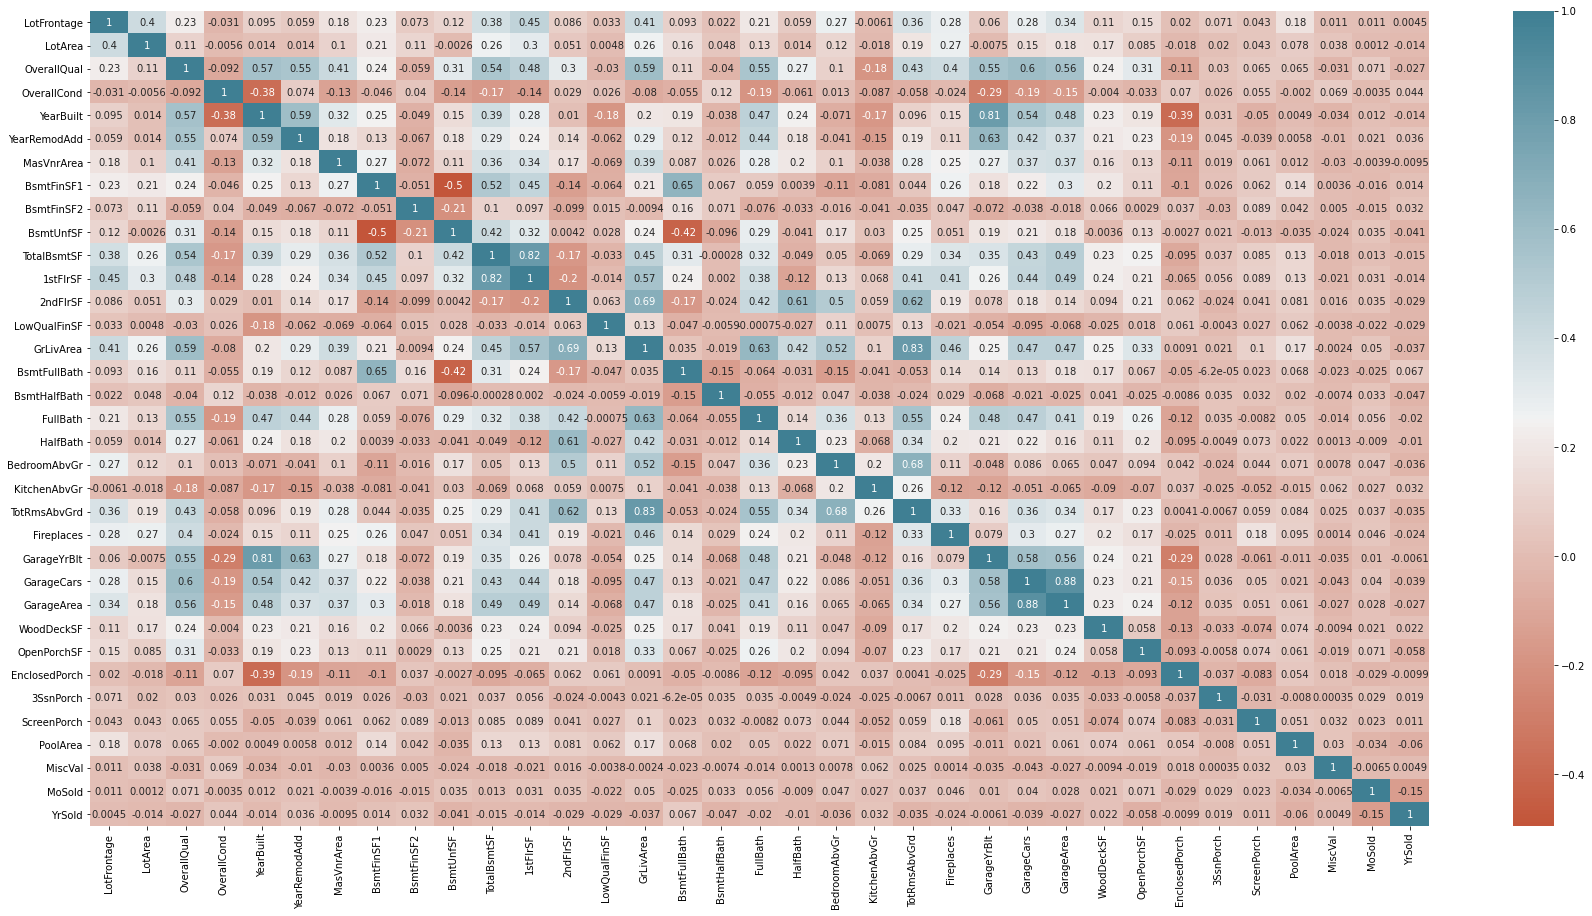

In [35]:
plt.subplots(figsize=(30,15))
ax = sns.heatmap(
data3.corr() ,
cmap=sns.diverging_palette(20,220, n=200),
annot=True)

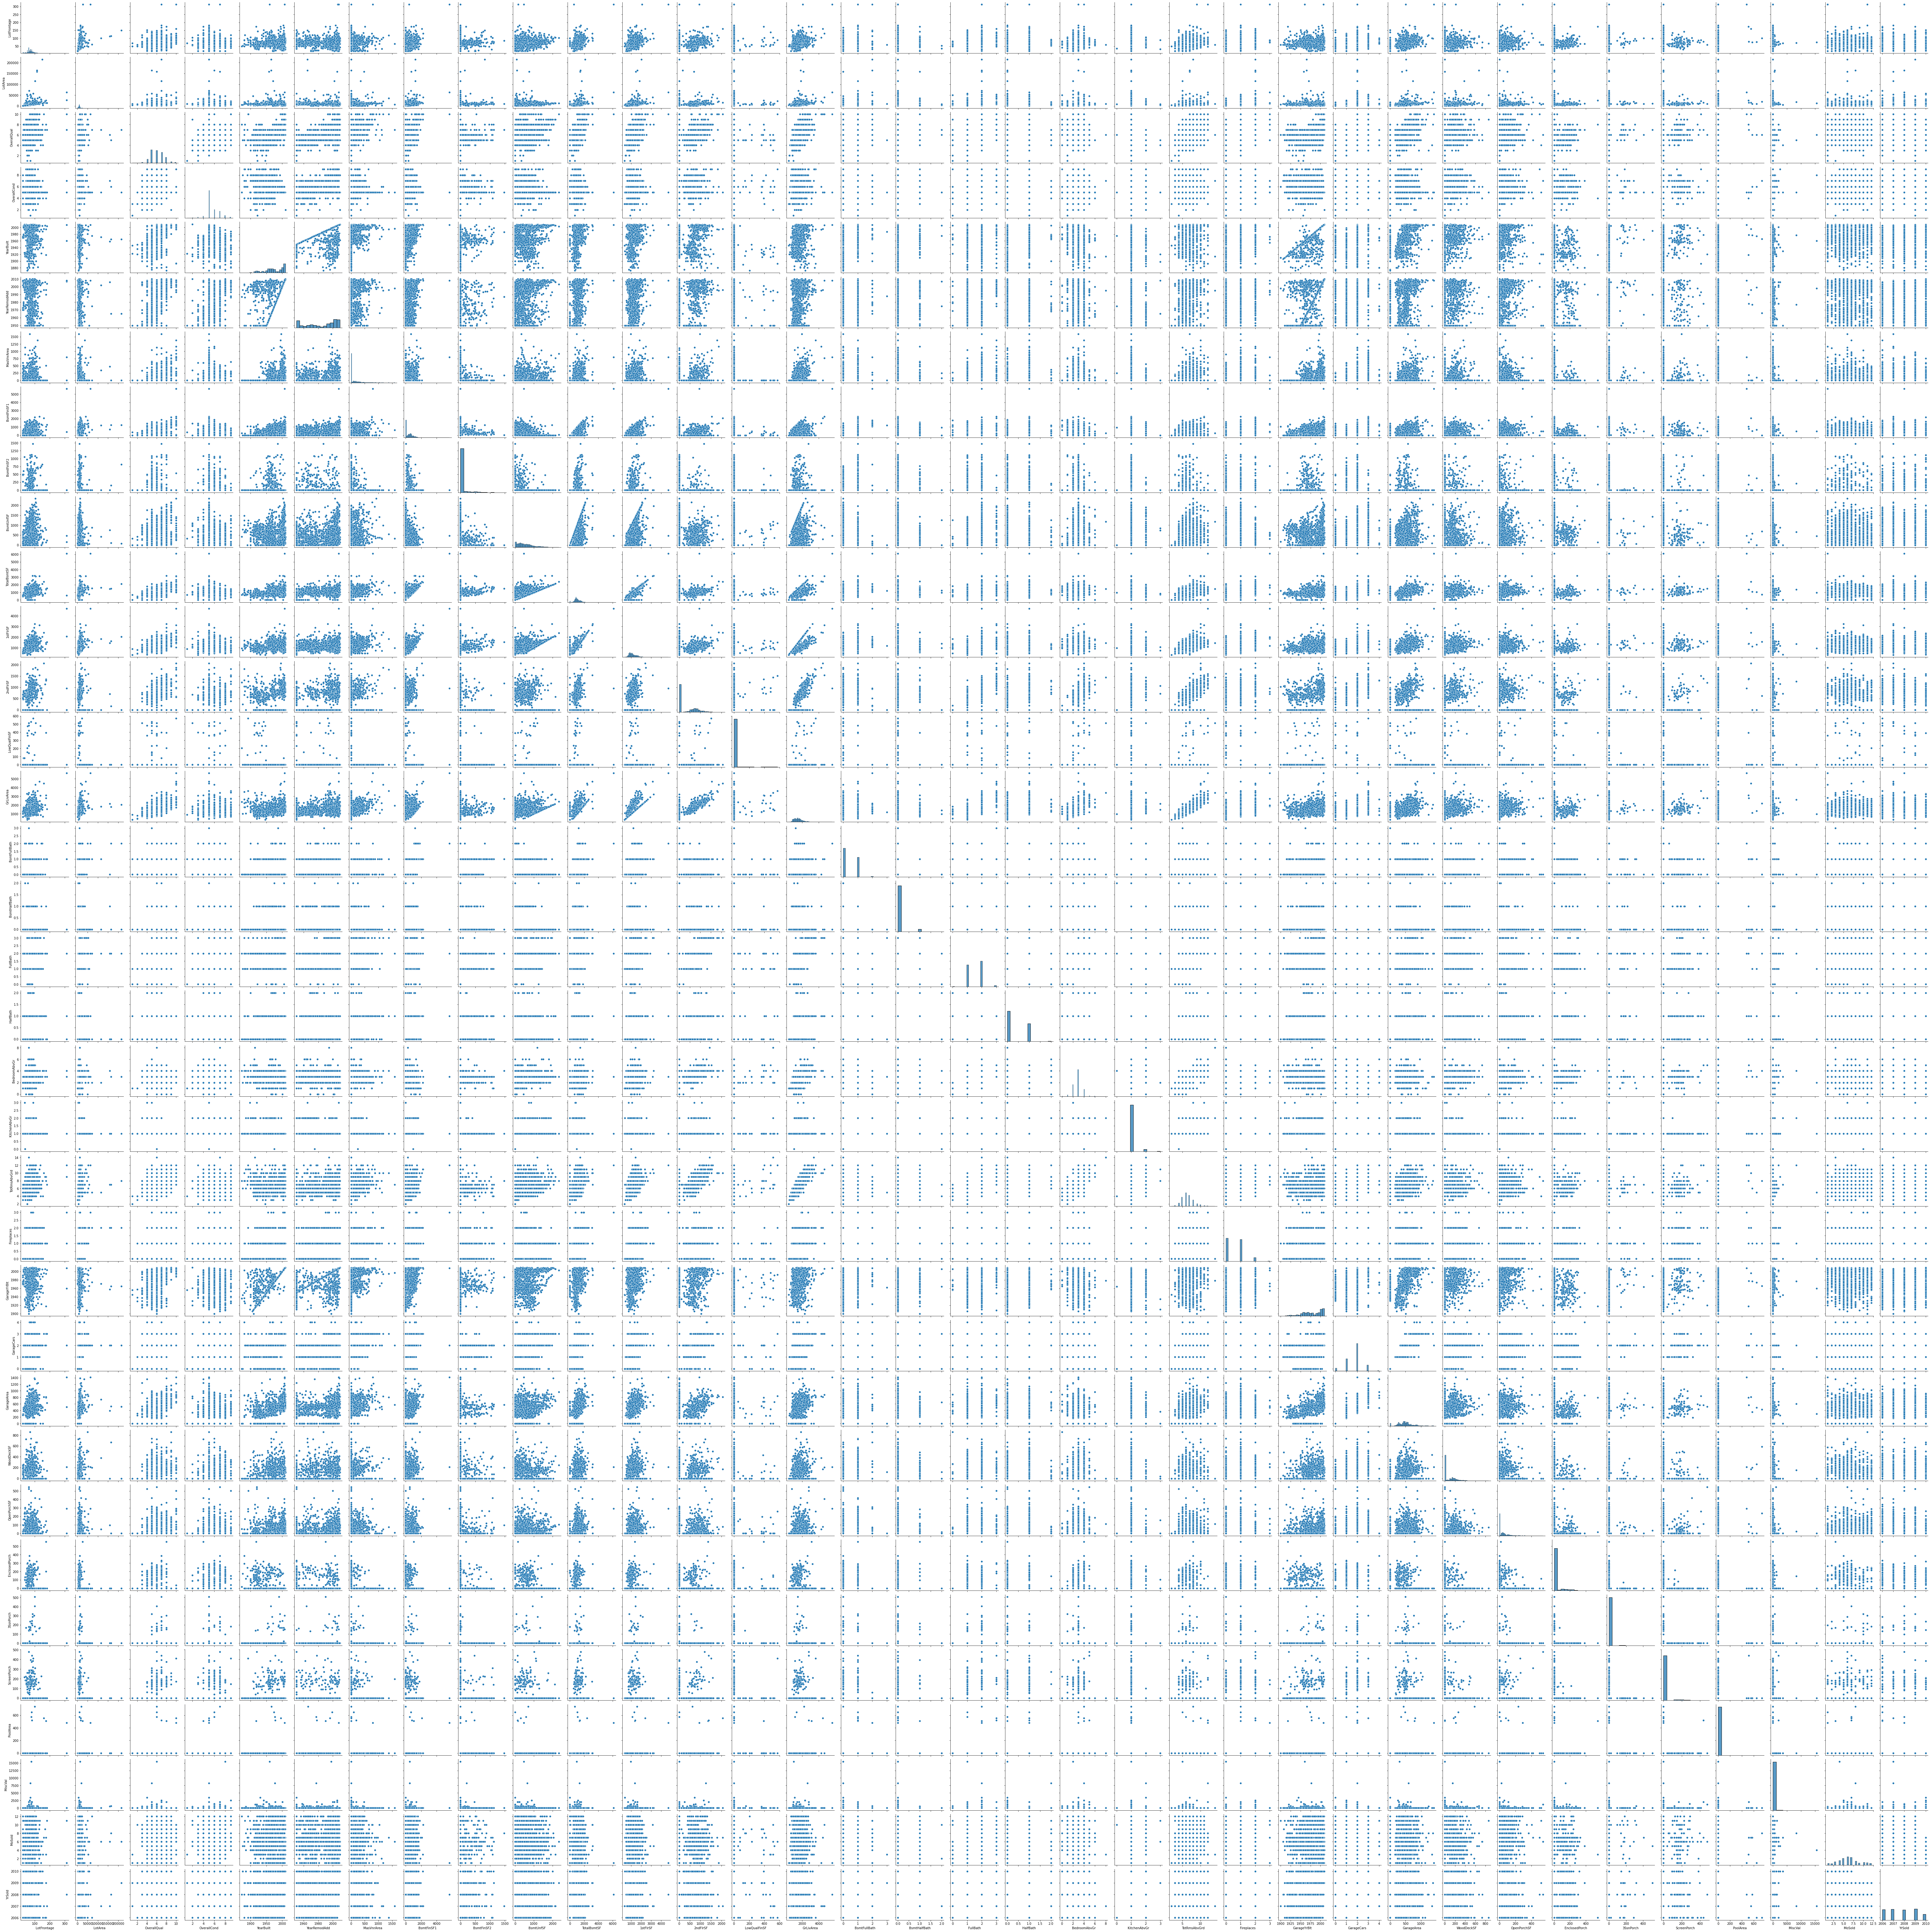

In [36]:
sns.pairplot(data3)

# Feature Engineering

In [37]:
# I took this step from notbook of someone how has domain knowledge cause I tried to understand the data but there is a shortage
#of time 
data3["SqFtPerRoom"] = data3["GrLivArea"] / (data3["TotRmsAbvGrd"] +
                                                       data3["FullBath"] +
                                                       data3["HalfBath"] +
                                                       data3["KitchenAbvGr"])

data3['Total_Home_Quality'] = data3['OverallQual'] + data3['OverallCond']

data3['Total_Bathrooms'] = (data3['FullBath'] + (0.5 * data3['HalfBath']) +
                               data3['BsmtFullBath'] + (0.5 * data3['BsmtHalfBath']))

data3["HighQualSF"] = data3["1stFlrSF"] + data3["2ndFlrSF"]

# feature transformation 

In [38]:
data4 = data3.copy() 

In [39]:
mask2 = data3.select_dtypes(np.number).skew().apply(abs) > .5

In [40]:
 skewed_cols = data3.select_dtypes(np.number).loc[:,mask2].columns

In [41]:
skewed_cols

Index(['LotFrontage', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SqFtPerRoom', 'HighQualSF'],
      dtype='object')

In [42]:
for column in skewed_cols:
      data4[column] = np.log1p(data4[column] )

In [43]:
data4.select_dtypes(np.number).skew()

LotFrontage           -0.816744
LotArea               -0.137129
OverallQual            0.216220
OverallCond           -0.253433
YearBuilt             -0.640905
YearRemodAdd          -0.511581
MasVnrArea             0.481001
BsmtFinSF1            -0.617548
BsmtFinSF2             2.527463
BsmtUnfSF             -2.185562
TotalBsmtSF           -5.151105
1stFlrSF               0.080458
2ndFlrSF               0.288889
LowQualFinSF           7.455137
GrLivArea             -0.006523
BsmtFullBath           0.419871
BsmtHalfBath           3.930243
FullBath               0.035871
HalfBath               0.566852
BedroomAbvGr           0.211815
KitchenAbvGr           3.866638
TotRmsAbvGrd          -0.058449
Fireplaces             0.181369
GarageYrBlt           -0.576983
GarageCars            -0.343185
GarageArea             0.179257
WoodDeckSF             0.153878
OpenPorchSF           -0.022716
EnclosedPorch          2.110612
3SsnPorch              7.729609
ScreenPorch            3.148097
PoolArea

In [44]:
data5 = data4.copy()

# encoding categorical variable

In [45]:
data5 = pd.get_dummies(data5)


In [46]:
data6 = data5.copy()

## price transformation 

In [47]:
target.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [48]:
import scipy.stats
from scipy.stats.mstats import normaltest
from scipy.stats import boxcox 


In [49]:
result = boxcox(target)
normaltest(result[0])

NormaltestResult(statistic=24.658476329182104, pvalue=4.420586560910238e-06)

In [50]:
normaltest(target.values)

NormaltestResult(statistic=610.8359109472653, pvalue=2.283848353787728e-133)

In [51]:
normaltest(np.log1p(target.values))

NormaltestResult(statistic=25.507181803362386, pvalue=2.8919171511318714e-06)

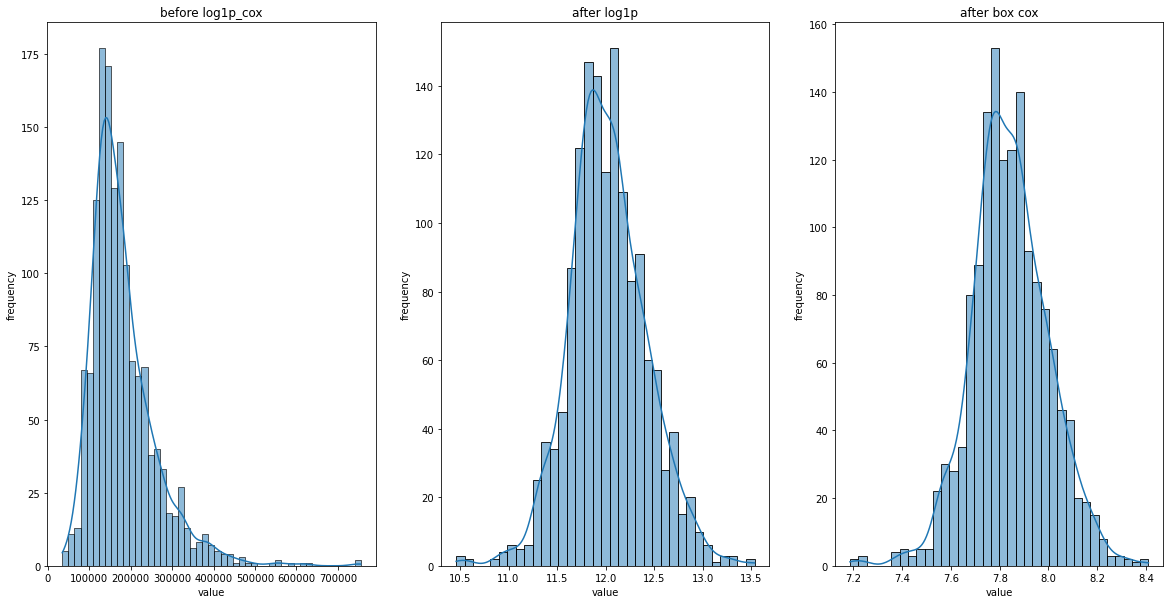

In [52]:
fig,(ax_before,ax_after_log,ax_after_box)=plt.subplots(1,3,figsize=(20,10))
sns.histplot(data = target,kde=True,ax = ax_before)
sns.histplot(data = np.log1p(target),kde = True ,ax = ax_after_log)
sns.histplot(data = result[0],kde = True ,ax = ax_after_box)
ax_before.set(title='before log1p_cox',xlabel='value',ylabel='frequency')
ax_after_log.set(title="after log1p",xlabel='value',ylabel='frequency')
ax_after_box.set(title = "after box cox",xlabel = "value",ylabel = 'frequency');

In [50]:
target_box = result[0]

In [51]:
target1 = pd.Series(target_box)


# splitting train and test again 

In [52]:
train_final = data6.loc[:train1.index.max(), :].copy()
test_final = data6.iloc[train1.index.max() + 1:, :].reset_index(drop=True).copy()

In [53]:
train_final.shape

(1460, 321)

In [54]:
target1.shape

(1460,)

In [55]:
#prediction and hperparameter selection 

In [56]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [57]:
X_train , X_test , y_train , y_test = train_test_split(train_final , target1)
kf = KFold(shuffle = True ,random_state = 72018,n_splits =3)
params = {"max_depth":[2,3,5,6],"lambda" :[.5,1,2,5]}
xgb = XGBRegressor()
grid = GridSearchCV(xgb , params , cv = kf)

In [58]:
grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=72018, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                               

In [59]:
grid.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='', lambda=2,
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0, ...)

In [60]:
gridbest = grid.best_estimator_

In [61]:
y1predict = gridbest.predict(X_train)

In [62]:
y_predict = gridbest.predict(X_test)

In [63]:
r2_score(y_train,y1predict )

0.9597734748557267

In [64]:
r2_score(y_test , y_predict)

0.8805416155144569

In [65]:
y2predict = gridbest.predict(train_final)

In [66]:
r2_score(target1 , y2predict)

0.9403378467386775

In [67]:
prediction = gridbest.predict(test_final)

In [68]:
from scipy.special import inv_boxcox

In [69]:
prediction1 = inv_boxcox(prediction,  -0.07692391328663316)

In [70]:
sample_submission['SalePrice'] = np.array(prediction1)

In [71]:
sample_submission.to_csv('my_submission.csv', index=False)